# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_style('whitegrid')
%matplotlib inline

import missingno

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import xgboost
import catboost
import lightgbm

# Feature Engineering

In [2]:
df_train = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
df_test = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
sub = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/sample_submission.csv')

**Features in Given Data set**

**enrollee_id:** Unique ID for candidate

**city:** City code

**city_ development _index :** Developement index of the city (scaled)

**gender:** Gender of candidate

**relevent_experience:** Relevant experience of candidate

**enrolled_university:** Type of University course enrolled if any

**education_level:** Education level of candidate

**major_discipline :** Education major discipline of candidate

**experience:** Candidate total experience in years

**company_size:** No of employees in current employer's company

**company_type :** Type of current employer

**lastnewjob:** Difference in years between previous job and current job

**training_hours:** training hours completed

**target:** 0 – Not looking for job change, 1 – Looking for a job change

In [3]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
#information about given data
df = df_train.copy()
print("Summary of the given dataset: \n ")
print(df.info())

Summary of the given dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: fl

In [5]:
#checking null values in given dataset
print("Null Values : \n {}".format(df_train.isnull().sum()))

Null Values : 
 enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [6]:
#Showing data types in given dataset
print("Datatypes of given data_set: \n{}".format(df_train.dtypes))

Datatypes of given data_set: 
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


In [7]:
print("Columns of the given dataset: {}".format(df.columns))

Columns of the given dataset: Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


In [8]:
#transpose the given dataset
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,19148,19149,19150,19151,19152,19153,19154,19155,19156,19157
enrollee_id,8949,29725,11561,33241,666,21651,28806,402,27107,699,...,9212,251,32313,11385,29754,7386,31398,24576,5756,23834
city,city_103,city_40,city_21,city_115,city_162,city_176,city_160,city_46,city_103,city_103,...,city_21,city_103,city_160,city_149,city_103,city_173,city_103,city_103,city_65,city_67
city_development_index,0.92,0.776,0.624,0.789,0.767,0.764,0.92,0.762,0.92,0.92,...,0.624,0.92,0.92,0.689,0.92,0.878,0.92,0.92,0.802,0.855
gender,Male,Male,NaN,NaN,Male,NaN,Male,Male,Male,NaN,...,NaN,Male,Female,Male,Female,Male,Male,Male,Male,NaN
relevent_experience,Has relevent experience,No relevent experience,No relevent experience,No relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,...,Has relevent experience,Has relevent experience,Has relevent experience,No relevent experience,Has relevent experience,No relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,No relevent experience
enrolled_university,no_enrollment,no_enrollment,Full time course,NaN,no_enrollment,Part time course,no_enrollment,no_enrollment,no_enrollment,no_enrollment,...,no_enrollment,no_enrollment,no_enrollment,Full time course,no_enrollment,no_enrollment,no_enrollment,no_enrollment,no_enrollment,no_enrollment
education_level,Graduate,Graduate,Graduate,Graduate,Masters,Graduate,High School,Graduate,Graduate,Graduate,...,Masters,Masters,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,High School,Primary School
major_discipline,STEM,STEM,STEM,Business Degree,STEM,STEM,NaN,STEM,STEM,STEM,...,STEM,STEM,STEM,NaN,Humanities,Humanities,STEM,STEM,NaN,NaN
experience,>20,15,5,<1,>20,11,5,13,7,17,...,3,9,10,2,7,14,14,>20,<1,2
company_size,NaN,50-99,NaN,NaN,50-99,NaN,50-99,<10,50-99,10000+,...,100-500,50-99,100-500,NaN,10/49,NaN,NaN,50-99,500-999,NaN


Basic Statstics

In [9]:
df.describe().style.background_gradient(cmap = 'RdBu_r')

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
df.corr().style.background_gradient(cmap = 'RdBu_r')

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


# Missing Values

<AxesSubplot:>

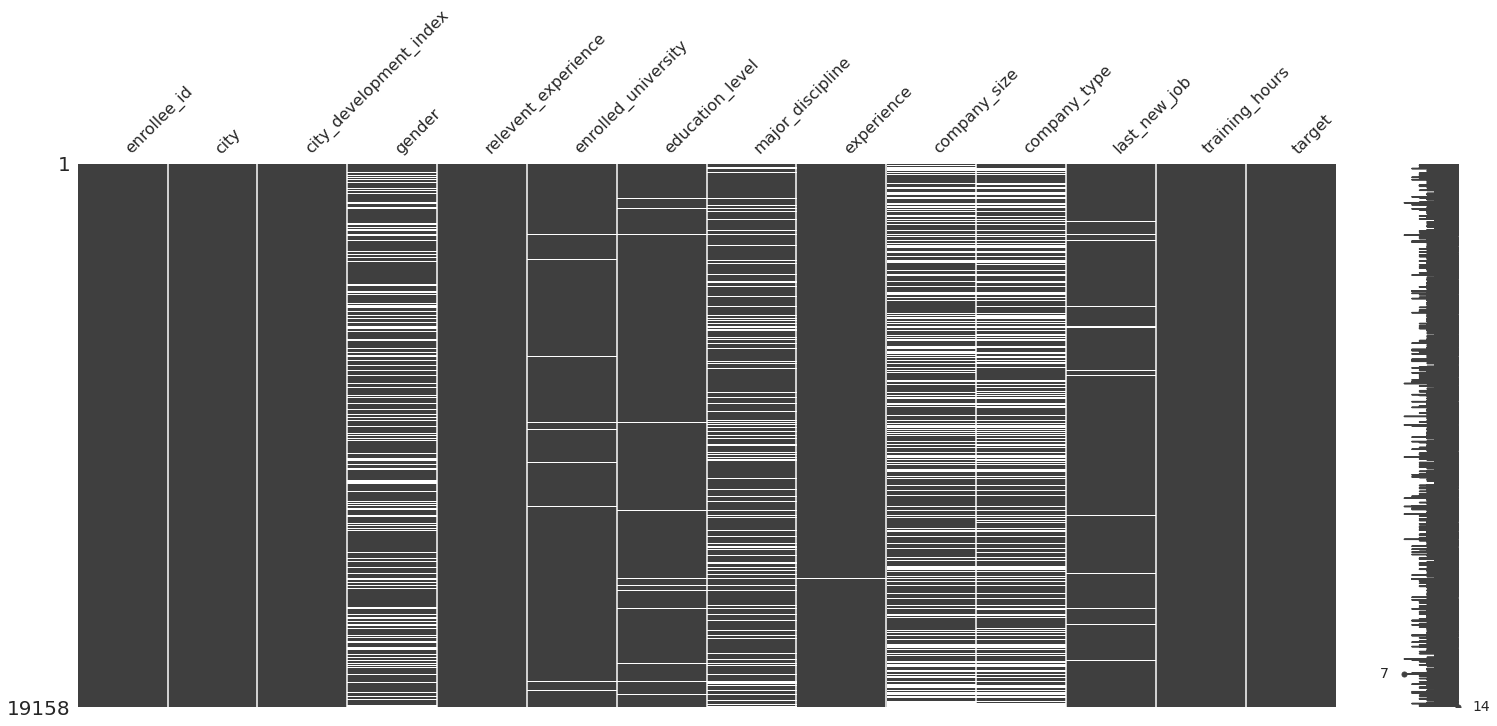

In [11]:
missingno.matrix(df)

<AxesSubplot:>

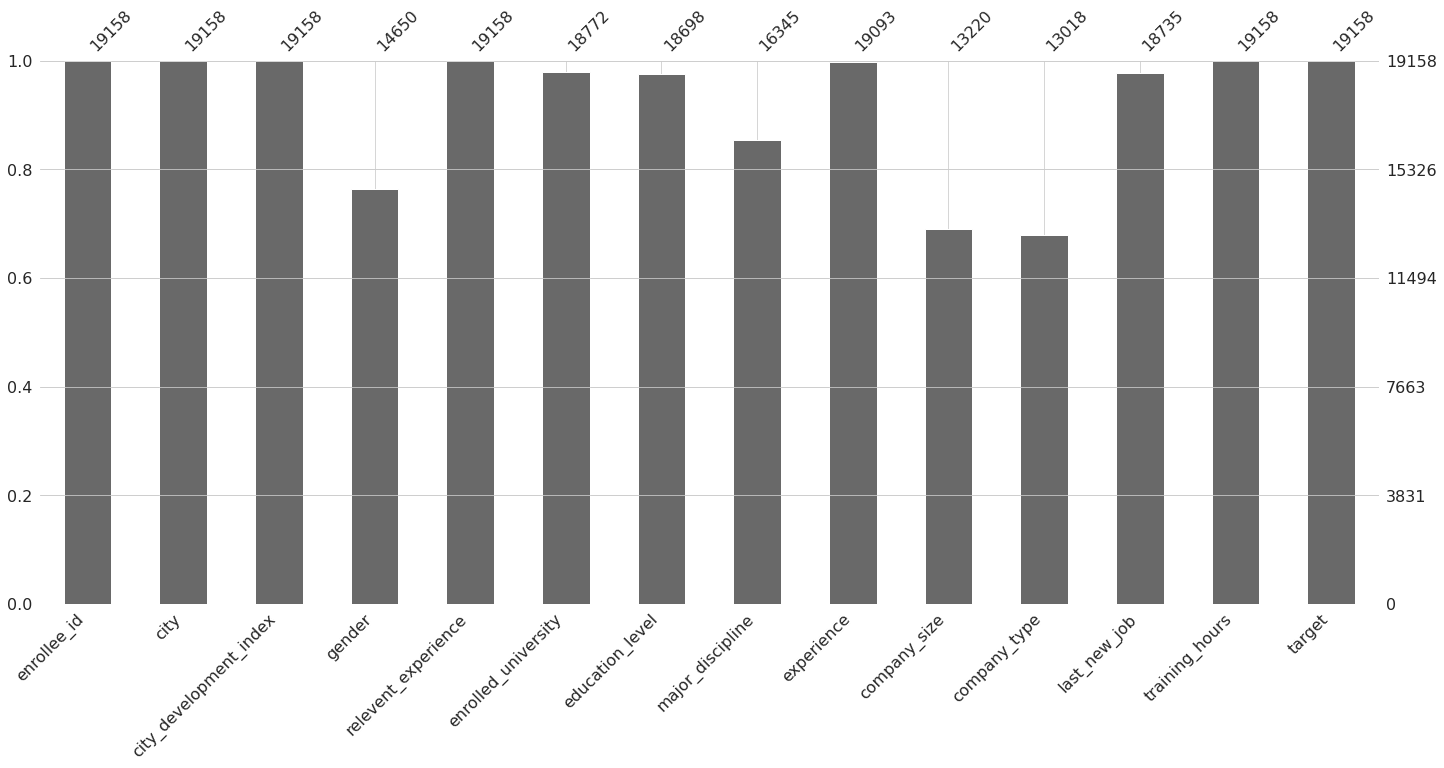

In [12]:
missingno.bar(df)

In [13]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [14]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [15]:
#filling missing values
df['company_type'].fillna(method= 'ffill', limit=2, inplace = True)
df['company_size'].fillna(method='ffill', limit = 2, inplace = True)
df['major_discipline'].fillna(method='ffill', limit = 2, inplace = True)
df['experience'].fillna(method='ffill', limit = 2, inplace=True)
df['enrolled_university'].fillna(method='ffill', limit = 2, inplace = True)
df['education_level'].fillna(method='ffill', limit = 2, inplace = True)
df['last_new_job'].fillna(method = 'ffill',limit =2, inplace = True)

In [16]:
df['enrolled_university'].fillna(method='bfill', limit = 2, inplace = True)
df['education_level'].fillna(method='bfill', limit = 2, inplace = True)
df['major_discipline'].fillna(method='bfill', limit = 2, inplace = True)
df['company_type'].fillna(method= 'bfill', limit=2, inplace = True)
df['company_size'].fillna(method='bfill', limit = 2, inplace = True)


In [17]:
df['company_type'].fillna(method= 'bfill', limit=2, inplace = True)
df['company_size'].fillna(method='bfill', limit = 2, inplace = True)

In [18]:

df['company_type'].fillna(method= 'bfill', limit=2, inplace = True)

In [19]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [20]:
#fill gender column
df['gender'] = [ 0 if gender == "Male" #0 for male
               else 1 if gender == "Female" #1 for female
               else 2 for gender in df["gender"]] #2 for other

In [21]:
print('Null values in given dataframe is: \n{}'.format(df.isnull().sum()))

Null values in given dataframe is: 
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


# Exploratory Data Analysis

Univariate Analysis

In [22]:
df['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [23]:
print('Unique cities are: \n{}'.format(df['city'].unique()))

Unique cities are: 
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 

In [24]:
px.histogram(data_frame=df, y = 'city')

<AxesSubplot:ylabel='Frequency'>

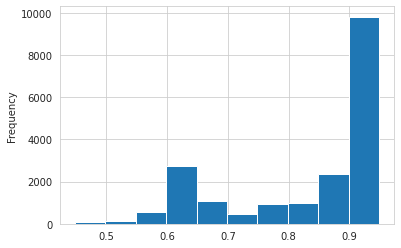

In [25]:
df['city_development_index'].plot(kind = 'hist')

mu value is: 0.8288480008351603, sigma value is: 0.12335853722992858
mean value is: 0.8288480008351684


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



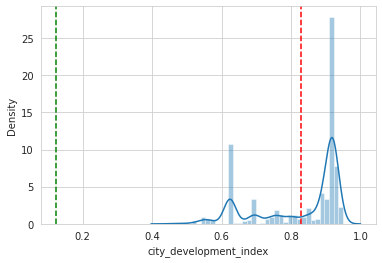

In [26]:
(mu, sigma) = scipy.stats.norm.fit(df['city_development_index'])
print("mu value is: {}, sigma value is: {}".format(mu, sigma))

cti_m = df['city_development_index'].describe()
print("mean value is: {}".format(cti_m['mean']))

sns.distplot(df['city_development_index'])
plt.axvline(mu, linestyle = '--',color = "red")
plt.axvline(sigma, linestyle = '--',color = "green")
#plt.axvline(cti_m['mean'], linestyle = '--',color = "black")

In [27]:
df['gender'].value_counts()

0    13221
2     4699
1     1238
Name: gender, dtype: int64

0    13221
2     4699
1     1238
Name: gender, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='gender', ylabel='count'>

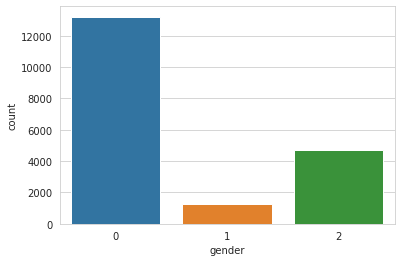

In [28]:
print(df['gender'].value_counts())
sns.countplot(df['gender'])

In [29]:
df['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

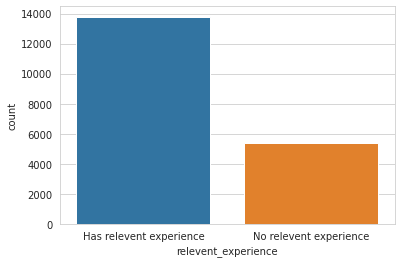

In [30]:
sns.countplot(df['relevent_experience'])

In [31]:
df['enrolled_university'].value_counts()

no_enrollment       14088
Full time course     3840
Part time course     1230
Name: enrolled_university, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

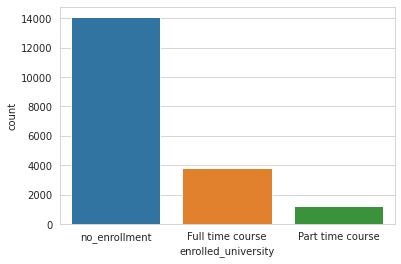

In [32]:
sns.countplot(df['enrolled_university'])

In [33]:
df['education_level'].value_counts()

Graduate          11890
Masters            4468
High School        2063
Phd                 421
Primary School      316
Name: education_level, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='education_level', ylabel='count'>

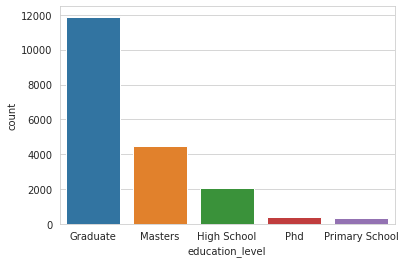

In [34]:
sns.countplot(df['education_level'])

In [35]:
df['major_discipline'].value_counts()

STEM               16989
Humanities           779
Other                447
Business Degree      389
Arts                 294
No Major             260
Name: major_discipline, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='major_discipline', ylabel='count'>

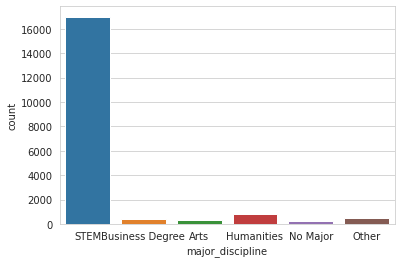

In [36]:
sns.countplot(df['major_discipline'])

In [37]:
fig = go.Figure(go.Pie(labels = df['major_discipline'].value_counts().keys().to_list(),
                values = df['major_discipline'].value_counts().to_list(),
                      hole = 0.5))
fig.show()

In [38]:
df['experience'].value_counts()

>20    3294
5      1437
4      1410
3      1362
6      1218
2      1132
7      1030
10      990
9       984
8       802
15      689
11      665
14      589
1       550
<1      524
16      510
12      495
13      401
17      344
19      304
18      280
20      148
Name: experience, dtype: int64

In [39]:
fig = px.histogram(data_frame=df, y = 'experience')
fig.show()

In [40]:
df['company_size'].value_counts()

50-99        4489
100-500      3751
10000+       2891
10/49        2122
1000-4999    1947
<10          1864
500-999      1265
5000-9999     829
Name: company_size, dtype: int64

<AxesSubplot:xlabel='count', ylabel='company_size'>

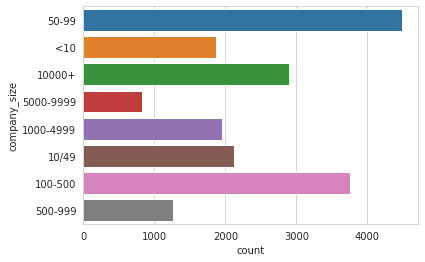

In [41]:
sns.countplot(y = df['company_size'])

In [42]:
df['company_type'].value_counts()

Pvt Ltd                14517
Funded Startup          1454
Public Sector           1377
Early Stage Startup      900
NGO                      739
Other                    171
Name: company_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='company_type'>

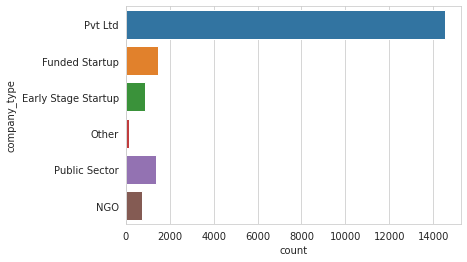

In [43]:
sns.countplot(y = df['company_type'])

In [44]:
df['last_new_job'].value_counts()

1        8217
>4       3362
2        2975
never    2508
4        1055
3        1041
Name: last_new_job, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='last_new_job', ylabel='count'>

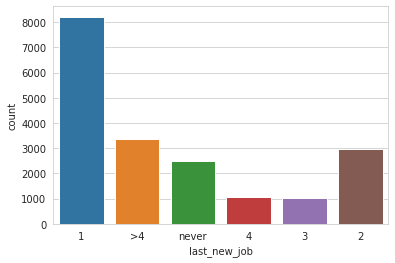

In [45]:
sns.countplot(df['last_new_job'])

<AxesSubplot:ylabel='Frequency'>

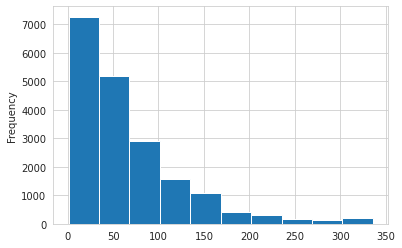

In [46]:
df['training_hours'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

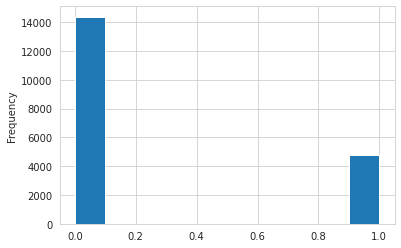

In [47]:
df['target'].plot(kind = 'hist')

In [48]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

Bivariate Analysis

In [49]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [50]:
fig = px.histogram(data_frame = df, x = 'education_level', color = 'gender')
fig.show()

In [51]:
fig = px.histogram(data_frame = df, color = 'gender', x= 'experience')
fig.show()

In [52]:
fig = px.histogram(data_frame = df, x = 'education_level', color = 'company_type')
fig.show()

In [53]:
fig = px.histogram(data_frame = df, x = 'education_level', color = 'last_new_job')
fig.show()

In [54]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

# Machine Learning Model creation

In [55]:
train_data = df.copy()

In [56]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,0,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,0,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,2,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,2,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,0,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [57]:
train_data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [58]:
del train_data['enrollee_id']
del train_data['city']

Test data preprocessing

In [59]:
test_df = df_test.copy()

In [60]:
test_df['gender'] = [ 0 if gender == "Male" #0 for male
               else 1 if gender == "Female" #1 for female
               else 2 for gender in test_df["gender"]] #2 for other

In [61]:
#filling missing values
test_df['company_type'].fillna(method= 'ffill', limit=2, inplace = True)
test_df['company_size'].fillna(method='ffill', limit = 2, inplace = True)
test_df['major_discipline'].fillna(method='ffill', limit = 2, inplace = True)
test_df['experience'].fillna(method='ffill', limit = 2, inplace=True)
test_df['enrolled_university'].fillna(method='ffill', limit = 2, inplace = True)
test_df['education_level'].fillna(method='ffill', limit = 2, inplace = True)
test_df['last_new_job'].fillna(method = 'ffill',limit =2, inplace = True)

In [62]:
test_df['major_discipline'].fillna(method='bfill', limit = 2, inplace = True)
test_df['company_type'].fillna(method= 'bfill', limit=2, inplace = True)
test_df['company_size'].fillna(method='bfill', limit = 2, inplace = True)

In [63]:

test_df['company_type'].fillna(method= 'bfill', limit=2, inplace = True)
test_df['company_size'].fillna(method='bfill', limit = 2, inplace = True)

In [64]:
test_df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [65]:
del test_df['enrollee_id']
del test_df['city']

In [66]:
test_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,0,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21
1,0.920,1,Has relevent experience,no_enrollment,Graduate,STEM,5,<10,Pvt Ltd,1,98
2,0.624,0,No relevent experience,no_enrollment,High School,STEM,<1,<10,Pvt Ltd,never,15
3,0.827,0,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,0.920,0,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


Preprocessing for model creation

In [67]:
cat = train_data.select_dtypes(include = 'object').columns

for cat in cat:
    le = LabelEncoder()
    train_data[cat] = le.fit_transform(train_data[cat])

In [68]:
cat_test = test_df.select_dtypes(include = 'object').columns

for cat in cat_test:
    le = LabelEncoder()
    test_df[cat] = le.fit_transform(test_df[cat])

In [69]:
test_df.dtypes

city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level             int64
major_discipline            int64
experience                  int64
company_size                int64
company_type                int64
last_new_job                int64
training_hours              int64
dtype: object

In [70]:
test_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,0,0,0,0,5,19,7,5,0,21
1,0.920,1,0,2,0,5,15,7,5,0,98
2,0.624,0,1,2,1,5,20,7,5,5,15
3,0.827,0,0,2,2,5,2,0,5,0,39
4,0.920,0,0,2,0,5,21,3,5,4,72


In [71]:
train_data.dtypes

city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level             int64
major_discipline            int64
experience                  int64
company_size                int64
company_type                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object

In [72]:
x_train = train_data.drop('target', axis = 1)
y_train = train_data['target']
x_test = test_df

In [73]:
print("training data shape is: {}".format(x_train.shape))
print("training data label shape is: {}".format(y_train.shape))
print("test data shape is: {}".format(x_test.shape))

training data shape is: (19158, 11)
training data label shape is: (19158,)
test data shape is: (2129, 11)


In [74]:
rfc = RandomForestClassifier(max_depth=10, n_jobs=5)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=5)

In [75]:
pred = rfc.predict(x_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [76]:
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[03:38:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
xgb_pred = xgb.predict(x_test)

In [78]:
xgb_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [79]:
sub['enrollee_id']

0       32403
1        9858
2       31806
3       27385
4       27724
        ...  
2124     1289
2125      195
2126    31762
2127     7873
2128    12215
Name: enrollee_id, Length: 2129, dtype: int64

In [80]:
submission = pd.DataFrame({'enrollee_id': sub['enrollee_id'],
              'target': xgb_pred})

In [81]:
submission.head()

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,1.0
3,27385,0.0
4,27724,0.0
